In [1]:
import numpy as np
import nltk
from nltk.corpus import*
import pandas as pd

In [2]:
Data_root = Data_root = ['P_0', 'P_1', 'P_2', 'P_3', 'P_4', 'P_5', 'P_6', 'P_7', 'P_8', 'P_9', 'P_10', 'P_11', 'P_12', 'P_13', 'P_14', 'P_15', 'P_16', 'P_17', 'P_18', 'P_19', 'P_20', 'C_0', 'C_1', 'C_2', 'C_3', 'C_4', 'C_5', 'C_6', 'C_7', 'C_8', 'C_9', 'C_10', 'C_11', 'C_12', 'C_13', 'C_14', 'C_15', 'C_16', 'C_17', 'C_18', 'C_19', 'C_20', 'J_0', 'J_1', 'J_2', 'J_3', 'J_4', 'J_5', 'J_6', 'J_7', 'J_8', 'J_9', 'J_10', 'J_11', 'J_12', 'J_13', 'J_14', 'J_15', 'J_16', 'J_17', 'J_18', 'J_19', 'J_20', 'Pr_0', 'Pr_1', 'Pr_2', 'Pr_3', 'Pr_4', 'Pr_5', 'Pr_6', 'Pr_7', 'Pr_8', 'Pr_9', 'Pr_10', 'Pr_11', 'Pr_12', 'Pr_13', 'Pr_14', 'Pr_15', 'Pr_16', 'Pr_17', 'Pr_18', 'Pr_19', 'Pr_20']

corpus = []
for i in range(84):
    corpus.append(PlaintextCorpusReader('C://Users/cse_223/Python_C_Java_Prolog_data_Clustering_84 group files list_Corpus/'+Data_root[i],'.*\.txt',encoding ="utf-8"))

In [3]:
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from gensim.models.doc2vec import Doc2Vec
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

In [4]:
data = []
for i in range(84):
    data.append(corpus[i].raw())

In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cse_223\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [6]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags = [str(i)]) 
              for i, _d in enumerate(data)]

In [7]:
model = gensim.models.doc2vec.Doc2Vec(vector_size = 30, min_count = 2, epochs = 80)

In [8]:
model.build_vocab(tagged_data)

In [9]:
model.train(tagged_data, total_examples=model.corpus_count, epochs=80)

In [10]:
model.save("Doc2vec.model")

In [11]:
model = Doc2Vec.load("Doc2vec.model")

# Python Clustering 0 group target

In [12]:
similar_doc = model.docvecs.most_similar('0')
print(similar_doc[0])

('2', 0.8802582621574402)


In [13]:
similar_doc

[('2', 0.8802582621574402),
 ('10', 0.8447707295417786),
 ('7', 0.833294689655304),
 ('11', 0.829149603843689),
 ('8', 0.8034250736236572),
 ('6', 0.7992241382598877),
 ('3', 0.7824594974517822),
 ('54', 0.7783228158950806),
 ('12', 0.7701857089996338),
 ('5', 0.7657901048660278)]

In [14]:
model['0']

array([-0.77956176, -0.76622725, -0.64733267,  1.1412117 ,  0.64666605,
        1.9081405 , -2.4459016 , -0.86776537,  3.6625311 , -2.6233776 ,
        0.78304493, -1.1218812 , -0.703213  , -2.6446302 , -1.3851012 ,
       -1.1280601 ,  1.2611576 , -1.9842831 , -0.1592902 , -0.1128077 ,
        5.7917027 , -1.239229  ,  2.7241333 ,  0.17907527, -1.7672254 ,
        1.2958757 ,  0.80654985,  1.0667131 ,  4.619297  , -0.19777155],
      dtype=float32)

In [15]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=85)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

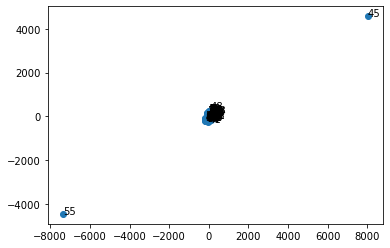

In [16]:
display_closestwords_tsnescatterplot(model, '0')

In [17]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
[[-0.77956176 -0.76622725 -0.64733267 ...  1.0667131   4.619297
  -0.19777155]
 [-1.3379048  -0.6056008  -0.08388423 ...  2.1020703   3.3426583
  -0.5350876 ]
 [-1.5250856  -1.3111327  -0.4799304  ...  2.6343467   3.5268412
  -0.47896624]
 ...
 [-0.6925632   2.2256174  -0.5240016  ...  0.74481404  2.4244525
  -0.18018657]
 [ 0.25318953  1.1237609   1.0547634  ...  1.0847285   1.1413052
   0.23915966]
 [ 0.00106104 -0.00411573 -0.01126159 ...  0.0053396   0.01551338
  -0.00107235]]


In [18]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

             x          y
0    72.153976 -49.196739
1    72.705452 -42.821331
2    74.345634 -35.889294
3    73.426277 -29.075397
4    79.162468 -27.452459
..         ...        ...
79  -91.990883  21.238716
80  -10.645437 -23.149595
81  -16.116930   7.997253
82  -81.377739   7.913716
83 -106.259010  23.444597

[84 rows x 2 columns]


In [19]:
df.to_csv('doc2vec0.csv')

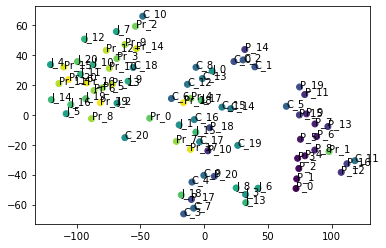

In [20]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [21]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

           x         y
0   3.154408  0.673755
1   3.093497  1.686342
2   5.120272  2.046572
3   5.732031  2.489840
4   4.645863  3.469761
..       ...       ...
79 -4.807036  0.346642
80  1.027089 -4.100385
81 -2.269355 -1.128570
82 -4.781033 -0.725638
83 -6.277021  0.709280

[84 rows x 2 columns]


In [22]:
df_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')

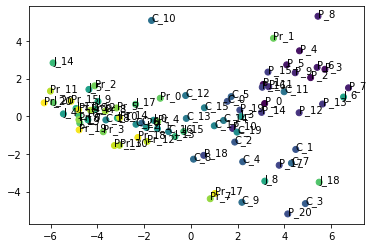

In [23]:
plt.scatter(df_1['x'], df_1['y'], c=range(84))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()

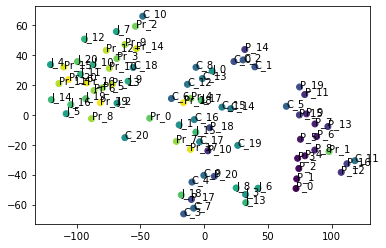

In [24]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

# Python Clustering 1 group target

In [25]:
similar_doc = model.docvecs.most_similar('1')
print(similar_doc[0])

('3', 0.8769197463989258)


In [26]:
similar_doc

[('3', 0.8769197463989258),
 ('4', 0.8735008835792542),
 ('2', 0.8532446622848511),
 ('12', 0.8526317477226257),
 ('8', 0.8471196889877319),
 ('7', 0.8417649269104004),
 ('6', 0.8348494172096252),
 ('13', 0.8329435586929321),
 ('11', 0.8030863404273987),
 ('14', 0.799728512763977)]

In [27]:
model['1']

array([-1.3379048 , -0.6056008 , -0.08388423,  1.1623925 ,  2.0224612 ,
        1.681653  , -0.5362625 ,  1.1494547 ,  2.7186484 , -1.3491982 ,
        0.879347  , -1.2758805 , -0.06186   , -2.5214643 , -0.8943781 ,
       -0.34298941,  0.2240945 , -1.9307328 , -0.9950489 , -0.5034927 ,
        6.0958953 , -1.5024115 ,  1.914711  , -0.10325926, -2.92893   ,
        1.2265102 ,  0.39790243,  2.1020703 ,  3.3426583 , -0.5350876 ],
      dtype=float32)

In [28]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=85)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

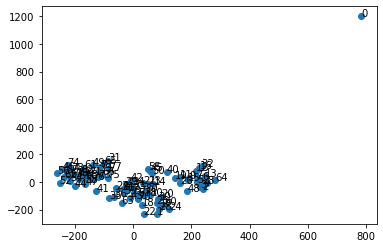

In [29]:
display_closestwords_tsnescatterplot(model, '1')

In [30]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
[[-0.77956176 -0.76622725 -0.64733267 ...  1.0667131   4.619297
  -0.19777155]
 [-1.3379048  -0.6056008  -0.08388423 ...  2.1020703   3.3426583
  -0.5350876 ]
 [-1.5250856  -1.3111327  -0.4799304  ...  2.6343467   3.5268412
  -0.47896624]
 ...
 [-0.6925632   2.2256174  -0.5240016  ...  0.74481404  2.4244525
  -0.18018657]
 [ 0.25318953  1.1237609   1.0547634  ...  1.0847285   1.1413052
   0.23915966]
 [ 0.00106104 -0.00411573 -0.01126159 ...  0.0053396   0.01551338
  -0.00107235]]


In [31]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

            x           y
0   -8.083342 -153.238312
1  -23.029932 -156.447174
2  -40.040703 -160.605484
3  -47.879551 -175.220306
4  -61.746407 -172.215714
..        ...         ...
79 -40.885361  205.455444
80  88.500839  -48.468098
81  66.024506   38.667549
82 -83.045578  219.283539
83 -22.759163  225.244614

[84 rows x 2 columns]


In [32]:
df.to_csv('doc2vec1.csv')

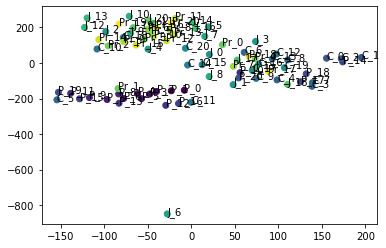

In [33]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [34]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

           x         y
0   3.154408  0.673755
1   3.093497  1.686342
2   5.120272  2.046572
3   5.732031  2.489840
4   4.645863  3.469761
..       ...       ...
79 -4.807036  0.346642
80  1.027089 -4.100385
81 -2.269355 -1.128570
82 -4.781033 -0.725638
83 -6.277021  0.709280

[84 rows x 2 columns]


In [35]:
df_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')

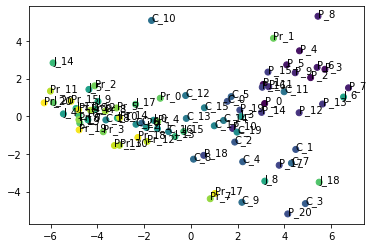

In [36]:
plt.scatter(df_1['x'], df_1['y'], c=range(84))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()

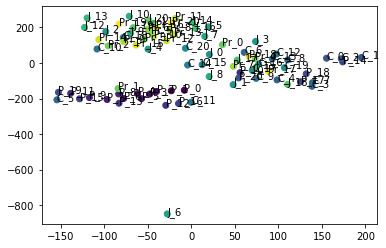

In [37]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

# Python Clustering 2 group target

In [38]:
similar_doc = model.docvecs.most_similar('2')
print(similar_doc[0])

('7', 0.9420426487922668)


In [39]:
similar_doc

[('7', 0.9420426487922668),
 ('4', 0.9234147071838379),
 ('6', 0.9152489304542542),
 ('3', 0.90968257188797),
 ('8', 0.9028059840202332),
 ('0', 0.8802582621574402),
 ('5', 0.8769864439964294),
 ('12', 0.8678328990936279),
 ('11', 0.8560159206390381),
 ('1', 0.8532446622848511)]

In [40]:
model['2']

array([-1.5250856 , -1.3111327 , -0.4799304 ,  1.2743355 ,  2.295297  ,
        1.1843549 ,  0.6517655 ,  1.264474  ,  3.355589  , -1.6139671 ,
        1.1856732 , -1.9545417 , -1.098026  , -3.4091685 , -0.3925429 ,
        0.6234385 , -0.6305042 , -0.8861984 , -2.6684341 ,  0.78118247,
        6.7843685 , -3.0171006 ,  2.08898   ,  0.67410284, -2.7835677 ,
        2.4043908 ,  0.6784911 ,  2.6343467 ,  3.5268412 , -0.47896624],
      dtype=float32)

In [41]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=85)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

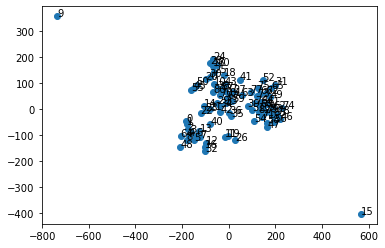

In [42]:
display_closestwords_tsnescatterplot(model, '2')

In [43]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
[[-0.77956176 -0.76622725 -0.64733267 ...  1.0667131   4.619297
  -0.19777155]
 [-1.3379048  -0.6056008  -0.08388423 ...  2.1020703   3.3426583
  -0.5350876 ]
 [-1.5250856  -1.3111327  -0.4799304  ...  2.6343467   3.5268412
  -0.47896624]
 ...
 [-0.6925632   2.2256174  -0.5240016  ...  0.74481404  2.4244525
  -0.18018657]
 [ 0.25318953  1.1237609   1.0547634  ...  1.0847285   1.1413052
   0.23915966]
 [ 0.00106104 -0.00411573 -0.01126159 ...  0.0053396   0.01551338
  -0.00107235]]


In [44]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

            x          y
0  -51.350952  44.290371
1  -48.275013  48.190430
2  -46.300194  53.470875
3  -42.667747  57.220322
4  -37.990314  56.656483
..        ...        ...
79  46.268898 -57.049427
80  -9.493516   9.465131
81  13.495316   2.375731
82  30.926058 -71.129578
83  56.407524 -61.255959

[84 rows x 2 columns]


In [45]:
df.to_csv('doc2vec2.csv')

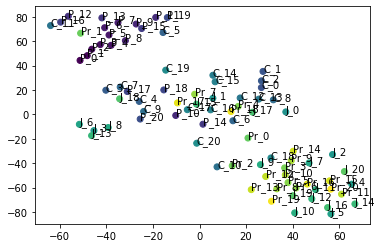

In [46]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [47]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

           x         y
0   3.154408  0.673755
1   3.093497  1.686342
2   5.120272  2.046572
3   5.732031  2.489840
4   4.645863  3.469761
..       ...       ...
79 -4.807036  0.346642
80  1.027089 -4.100385
81 -2.269355 -1.128570
82 -4.781033 -0.725638
83 -6.277021  0.709280

[84 rows x 2 columns]


In [48]:
df_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')

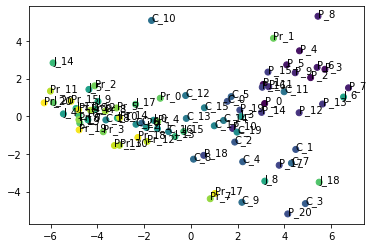

In [49]:
plt.scatter(df_1['x'], df_1['y'], c=range(84))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()

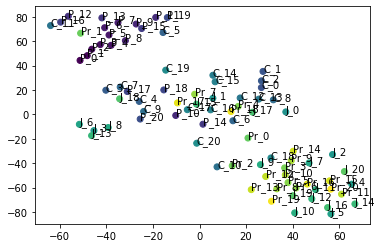

In [50]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

# Python Clustering 3 group target

In [51]:
similar_doc = model.docvecs.most_similar('3')
print(similar_doc[0])

('7', 0.9550922513008118)


In [52]:
similar_doc

[('7', 0.9550922513008118),
 ('4', 0.9355594515800476),
 ('6', 0.9286142587661743),
 ('8', 0.9185683131217957),
 ('11', 0.9143586158752441),
 ('2', 0.9096826314926147),
 ('1', 0.8769198060035706),
 ('5', 0.8760232329368591),
 ('10', 0.8557508587837219),
 ('12', 0.8417068719863892)]

In [53]:
model['3']

array([-1.6702272 , -1.236133  , -1.0031672 ,  1.5631814 ,  3.3361607 ,
        0.80227304,  1.2439752 ,  1.8740454 ,  2.6541219 , -0.3714257 ,
        1.5357845 , -1.7923243 , -0.7619291 , -2.5102193 , -0.13279593,
        0.9178878 , -0.6697127 , -1.1937346 , -2.1107497 ,  0.50382614,
        7.1775365 , -2.8415997 ,  3.0142121 ,  0.33505344, -1.521831  ,
        1.5576103 , -0.09935194,  2.826033  ,  5.468073  , -0.66875666],
      dtype=float32)

In [54]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=85)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

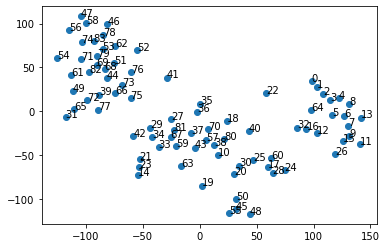

In [55]:
display_closestwords_tsnescatterplot(model, '3')

In [56]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
[[-0.77956176 -0.76622725 -0.64733267 ...  1.0667131   4.619297
  -0.19777155]
 [-1.3379048  -0.6056008  -0.08388423 ...  2.1020703   3.3426583
  -0.5350876 ]
 [-1.5250856  -1.3111327  -0.4799304  ...  2.6343467   3.5268412
  -0.47896624]
 ...
 [-0.6925632   2.2256174  -0.5240016  ...  0.74481404  2.4244525
  -0.18018657]
 [ 0.25318953  1.1237609   1.0547634  ...  1.0847285   1.1413052
   0.23915966]
 [ 0.00106104 -0.00411573 -0.01126159 ...  0.0053396   0.01551338
  -0.00107235]]


In [57]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

            x          y
0  -89.096199  -8.396473
1  -88.240807 -14.128406
2  -89.140656 -20.546825
3  -86.947723 -26.123363
4  -82.370468 -28.942715
..        ...        ...
79  61.781319  67.345291
80 -13.040794  -0.231476
81  13.008212   8.099481
82  51.877949  66.026260
83  69.510422  78.349838

[84 rows x 2 columns]


In [58]:
df.to_csv('doc2vec3.csv')

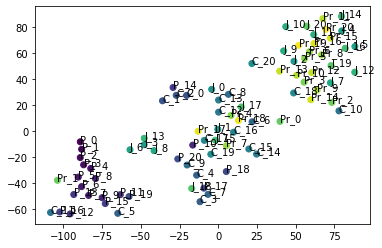

In [59]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [60]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

           x         y
0   3.154408  0.673755
1   3.093497  1.686342
2   5.120272  2.046572
3   5.732031  2.489840
4   4.645863  3.469761
..       ...       ...
79 -4.807036  0.346642
80  1.027089 -4.100385
81 -2.269355 -1.128570
82 -4.781033 -0.725638
83 -6.277021  0.709280

[84 rows x 2 columns]


In [61]:
df_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')

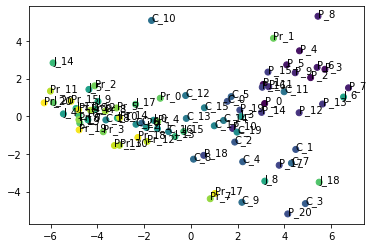

In [62]:
plt.scatter(df_1['x'], df_1['y'], c=range(84))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()

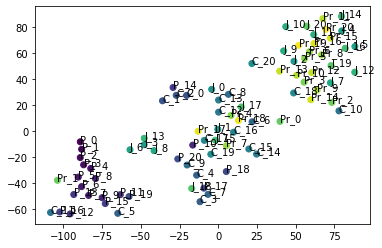

In [63]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

# Python Clustering 4 group target

In [64]:
similar_doc = model.docvecs.most_similar('4')
print(similar_doc[0])

('3', 0.9355594515800476)


In [65]:
similar_doc

[('3', 0.9355594515800476),
 ('2', 0.9234147071838379),
 ('8', 0.9085509777069092),
 ('7', 0.8965551853179932),
 ('6', 0.8940247893333435),
 ('1', 0.8735009431838989),
 ('5', 0.8527387380599976),
 ('12', 0.8475793600082397),
 ('11', 0.837543785572052),
 ('13', 0.8132402896881104)]

In [66]:
model['4']

array([-1.407213  , -2.055196  , -2.0155714 ,  1.620827  ,  3.3632479 ,
        1.6685121 ,  0.50442904,  1.4792639 ,  2.8205116 , -0.7694203 ,
        2.703271  , -1.5788687 , -0.03681857, -2.524245  , -0.556603  ,
        0.317464  , -0.7027862 , -0.20441025, -1.5697289 ,  1.1604997 ,
        5.5646873 , -1.7754923 ,  2.934606  , -0.25773302, -2.1232808 ,
        0.9967652 , -0.0324201 ,  2.7626567 ,  5.2267537 , -1.5759724 ],
      dtype=float32)

In [67]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=85)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

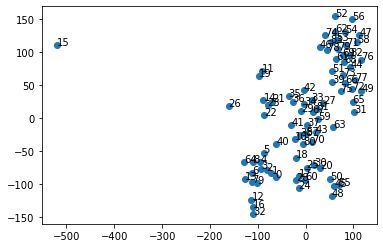

In [68]:
display_closestwords_tsnescatterplot(model, '4')

In [69]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
[[-0.77956176 -0.76622725 -0.64733267 ...  1.0667131   4.619297
  -0.19777155]
 [-1.3379048  -0.6056008  -0.08388423 ...  2.1020703   3.3426583
  -0.5350876 ]
 [-1.5250856  -1.3111327  -0.4799304  ...  2.6343467   3.5268412
  -0.47896624]
 ...
 [-0.6925632   2.2256174  -0.5240016  ...  0.74481404  2.4244525
  -0.18018657]
 [ 0.25318953  1.1237609   1.0547634  ...  1.0847285   1.1413052
   0.23915966]
 [ 0.00106104 -0.00411573 -0.01126159 ...  0.0053396   0.01551338
  -0.00107235]]


In [70]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

              x           y
0     87.016861  -44.335003
1    102.269394  -37.771763
2   1958.080444  617.565796
3    137.848053  -33.951351
4    149.314209  -45.013988
..          ...         ...
79  -179.473709 -101.983910
80   -10.926231   20.168583
81   -31.849480  108.809677
82  -183.548813  -52.532524
83  -212.316589 -131.737259

[84 rows x 2 columns]


In [71]:
df.to_csv('doc2vec4.csv')

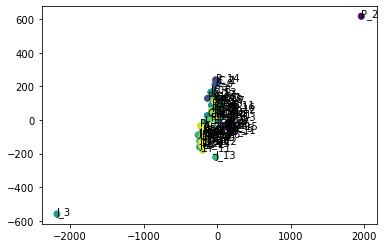

In [72]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [73]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

           x         y
0   3.154408  0.673755
1   3.093497  1.686342
2   5.120272  2.046572
3   5.732031  2.489840
4   4.645863  3.469761
..       ...       ...
79 -4.807036  0.346642
80  1.027089 -4.100385
81 -2.269355 -1.128570
82 -4.781033 -0.725638
83 -6.277021  0.709280

[84 rows x 2 columns]


In [74]:
df_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')

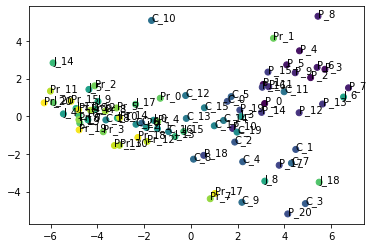

In [75]:
plt.scatter(df_1['x'], df_1['y'], c=range(84))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()

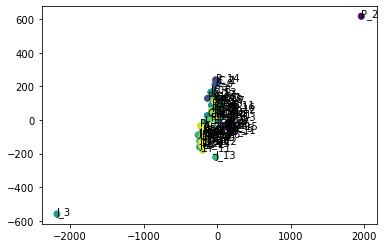

In [76]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

# Python Clustering 5 group target

In [77]:
similar_doc = model.docvecs.most_similar('5')
print(similar_doc[0])

('7', 0.8958339095115662)


In [78]:
similar_doc

[('7', 0.8958339095115662),
 ('2', 0.8769864439964294),
 ('3', 0.8760232329368591),
 ('6', 0.8621724247932434),
 ('4', 0.8527387380599976),
 ('10', 0.836093544960022),
 ('15', 0.8156822323799133),
 ('11', 0.8099774122238159),
 ('8', 0.8047703504562378),
 ('16', 0.7867224812507629)]

In [79]:
model['5']

array([-1.5717633 , -1.005501  , -2.3595006 ,  0.95637006,  2.948641  ,
        1.6413167 , -0.29741347,  1.7923087 ,  1.9819031 ,  0.61832154,
        1.6121904 , -3.055346  , -1.6693553 , -1.2018423 , -0.367525  ,
       -0.5672852 ,  1.1020463 , -1.6323445 , -0.20215337, -0.46845716,
        4.526456  , -2.2753985 ,  2.3687978 ,  0.92789286, -0.6115801 ,
        0.06510345,  1.6059041 ,  2.7716932 ,  6.9473763 , -1.34423   ],
      dtype=float32)

In [80]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=85)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

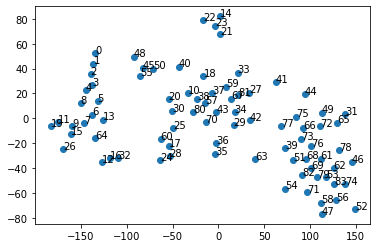

In [81]:
display_closestwords_tsnescatterplot(model, '5')

In [82]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
[[-0.77956176 -0.76622725 -0.64733267 ...  1.0667131   4.619297
  -0.19777155]
 [-1.3379048  -0.6056008  -0.08388423 ...  2.1020703   3.3426583
  -0.5350876 ]
 [-1.5250856  -1.3111327  -0.4799304  ...  2.6343467   3.5268412
  -0.47896624]
 ...
 [-0.6925632   2.2256174  -0.5240016  ...  0.74481404  2.4244525
  -0.18018657]
 [ 0.25318953  1.1237609   1.0547634  ...  1.0847285   1.1413052
   0.23915966]
 [ 0.00106104 -0.00411573 -0.01126159 ...  0.0053396   0.01551338
  -0.00107235]]


In [83]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

             x          y
0    19.871861  70.296135
1    31.890224  74.908348
2    44.139538  82.470734
3    57.844933  78.912651
4    61.821934  90.337677
..         ...        ...
79 -131.487900  17.702597
80   42.789597 -28.993906
81    9.197661 -65.027634
82 -108.389832  27.727694
83 -153.063110  43.605526

[84 rows x 2 columns]


In [84]:
df.to_csv('doc2vec5.csv')

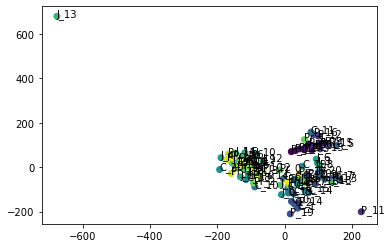

In [85]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [86]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

           x         y
0   3.154408  0.673755
1   3.093497  1.686342
2   5.120272  2.046572
3   5.732031  2.489840
4   4.645863  3.469761
..       ...       ...
79 -4.807036  0.346642
80  1.027089 -4.100385
81 -2.269355 -1.128570
82 -4.781033 -0.725638
83 -6.277021  0.709280

[84 rows x 2 columns]


In [87]:
df_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')

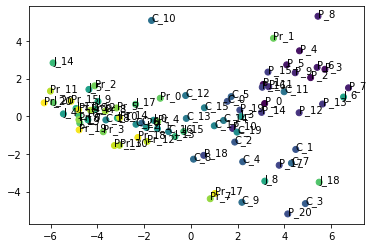

In [88]:
plt.scatter(df_1['x'], df_1['y'], c=range(84))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()

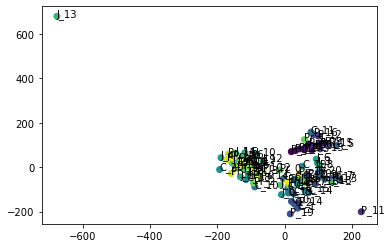

In [89]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

# Python Clustering 6 group target

In [90]:
similar_doc = model.docvecs.most_similar('6')
print(similar_doc[0])

('8', 0.958020031452179)


In [91]:
similar_doc

[('8', 0.958020031452179),
 ('7', 0.9329468011856079),
 ('3', 0.9286142587661743),
 ('2', 0.9152489900588989),
 ('12', 0.9129912853240967),
 ('4', 0.8940247893333435),
 ('5', 0.8621724843978882),
 ('13', 0.8540962338447571),
 ('11', 0.8510078191757202),
 ('16', 0.840648889541626)]

In [92]:
model['6']

array([-0.5518857 ,  0.3471457 ,  0.14027092, -0.34272328,  3.1083832 ,
        1.1670643 , -0.38592672,  2.1748064 ,  2.184134  , -0.31290278,
        2.5097797 , -1.7305626 , -2.4726088 , -2.273567  , -0.39750624,
        1.1875991 ,  0.43071204,  0.45915452,  0.00004398, -0.5551417 ,
        6.224433  , -2.6017358 ,  3.8029346 ,  0.4035562 , -1.3545313 ,
        1.8708906 ,  1.0936015 ,  2.4100711 ,  6.3332634 , -1.3208286 ],
      dtype=float32)

In [93]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=85)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

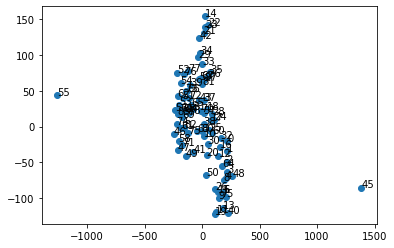

In [94]:
display_closestwords_tsnescatterplot(model, '6')

In [95]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
[[-0.77956176 -0.76622725 -0.64733267 ...  1.0667131   4.619297
  -0.19777155]
 [-1.3379048  -0.6056008  -0.08388423 ...  2.1020703   3.3426583
  -0.5350876 ]
 [-1.5250856  -1.3111327  -0.4799304  ...  2.6343467   3.5268412
  -0.47896624]
 ...
 [-0.6925632   2.2256174  -0.5240016  ...  0.74481404  2.4244525
  -0.18018657]
 [ 0.25318953  1.1237609   1.0547634  ...  1.0847285   1.1413052
   0.23915966]
 [ 0.00106104 -0.00411573 -0.01126159 ...  0.0053396   0.01551338
  -0.00107235]]


In [96]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

             x           y
0   101.221237 -163.822922
1    91.207672 -159.898819
2    80.574814 -154.577805
3    70.136650 -150.571716
4    60.207451 -150.140778
..         ...         ...
79  -47.951019  139.995651
80   22.672806   -3.771512
81  -29.880468    9.040051
82  -64.606987  116.064568
83  -35.523727  159.939728

[84 rows x 2 columns]


In [97]:
df.to_csv('doc2vec6.csv')

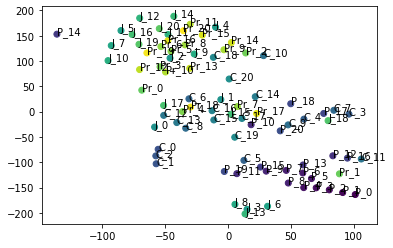

In [98]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [99]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

           x         y
0   3.154408  0.673755
1   3.093497  1.686342
2   5.120272  2.046572
3   5.732031  2.489840
4   4.645863  3.469761
..       ...       ...
79 -4.807036  0.346642
80  1.027089 -4.100385
81 -2.269355 -1.128570
82 -4.781033 -0.725638
83 -6.277021  0.709280

[84 rows x 2 columns]


In [100]:
df_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')

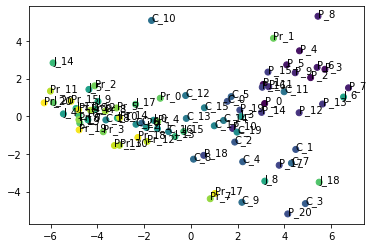

In [101]:
plt.scatter(df_1['x'], df_1['y'], c=range(84))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()

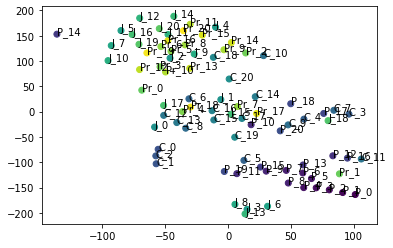

In [102]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

# Python Clustering 7 group target

In [103]:
similar_doc = model.docvecs.most_similar('7')
print(similar_doc[0])

('3', 0.9550922513008118)


In [104]:
similar_doc

[('3', 0.9550922513008118),
 ('2', 0.9420426487922668),
 ('8', 0.9368690252304077),
 ('6', 0.9329467415809631),
 ('11', 0.9034308195114136),
 ('4', 0.8965551853179932),
 ('5', 0.8958339095115662),
 ('10', 0.8639878034591675),
 ('14', 0.8454298973083496),
 ('1', 0.8417650461196899)]

In [105]:
model['7']

array([-1.2829742 ,  0.49801064, -1.5775161 , -0.5331105 ,  2.9178438 ,
        3.0581331 , -0.16527599,  1.2108153 ,  2.5144026 ,  0.6013396 ,
        2.080127  , -2.7878633 , -1.3564034 , -3.063814  , -0.48511633,
        1.4306859 ,  0.1805792 ,  1.098218  , -2.968672  , -1.1924163 ,
        6.2862806 , -1.6163371 ,  2.8879623 ,  2.4559472 , -1.8096566 ,
        1.8311398 ,  1.5552069 ,  3.5260808 ,  6.5402207 , -0.15663394],
      dtype=float32)

In [106]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=85)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

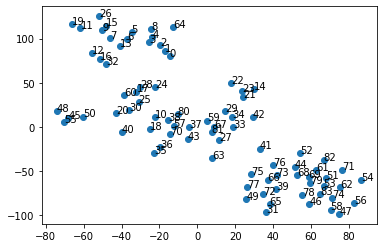

In [107]:
display_closestwords_tsnescatterplot(model, '7')

In [108]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
[[-0.77956176 -0.76622725 -0.64733267 ...  1.0667131   4.619297
  -0.19777155]
 [-1.3379048  -0.6056008  -0.08388423 ...  2.1020703   3.3426583
  -0.5350876 ]
 [-1.5250856  -1.3111327  -0.4799304  ...  2.6343467   3.5268412
  -0.47896624]
 ...
 [-0.6925632   2.2256174  -0.5240016  ...  0.74481404  2.4244525
  -0.18018657]
 [ 0.25318953  1.1237609   1.0547634  ...  1.0847285   1.1413052
   0.23915966]
 [ 0.00106104 -0.00411573 -0.01126159 ...  0.0053396   0.01551338
  -0.00107235]]


In [109]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

             x          y
0  -177.372589 -44.680069
1  -186.190826 -32.944889
2  -197.446747 -20.949448
3  -211.612244 -15.414901
4  -213.065536  -1.796919
..         ...        ...
79  204.439514 -20.695656
80  -49.154839  42.967140
81   14.467136  35.736370
82  203.588776  22.278133
83  229.494720 -43.033955

[84 rows x 2 columns]


In [110]:
df.to_csv('doc2vec7.csv')

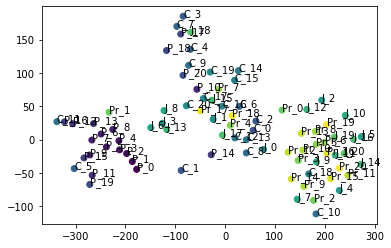

In [111]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [112]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

           x         y
0   3.154408  0.673755
1   3.093497  1.686342
2   5.120272  2.046572
3   5.732031  2.489840
4   4.645863  3.469761
..       ...       ...
79 -4.807036  0.346642
80  1.027089 -4.100385
81 -2.269355 -1.128570
82 -4.781033 -0.725638
83 -6.277021  0.709280

[84 rows x 2 columns]


In [113]:
df_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')

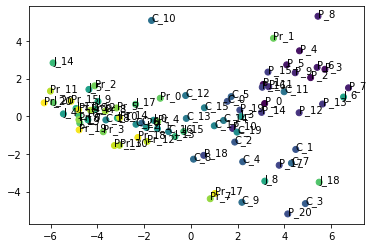

In [114]:
plt.scatter(df_1['x'], df_1['y'], c=range(84))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()

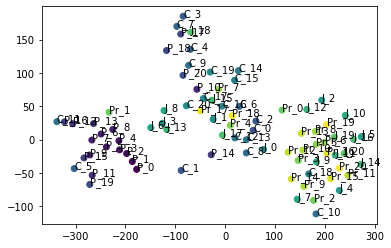

In [115]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

# Python Clustering 8 group target

In [116]:
similar_doc = model.docvecs.most_similar('8')
print(similar_doc[0])

('6', 0.9580199718475342)


In [117]:
similar_doc

[('6', 0.9580199718475342),
 ('7', 0.9368690252304077),
 ('3', 0.9185683131217957),
 ('4', 0.9085509777069092),
 ('2', 0.9028059840202332),
 ('12', 0.8736977577209473),
 ('1', 0.8471197485923767),
 ('11', 0.8455084562301636),
 ('13', 0.8078100681304932),
 ('5', 0.8047703504562378)]

In [118]:
model['8']

array([-1.3424196 , -1.0132908 , -2.0700471 , -0.26718318,  3.7389116 ,
        1.5033058 , -1.4185827 ,  2.4165432 ,  2.5563467 , -1.6867418 ,
        2.4534428 , -1.9663879 ,  0.09872701, -1.9361159 ,  1.1025841 ,
        1.534598  , -0.5682755 ,  1.7004321 , -1.0537176 ,  0.21100129,
        4.9236755 , -2.2504907 ,  3.3861442 , -1.0672842 , -2.6901238 ,
        1.149175  ,  1.1193422 ,  2.617775  ,  7.5131903 , -1.179161  ],
      dtype=float32)

In [119]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=85)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

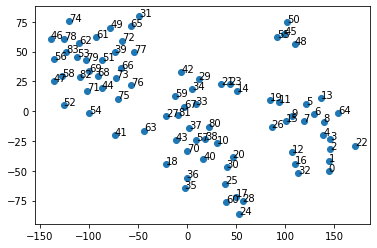

In [120]:
display_closestwords_tsnescatterplot(model, '8')

In [121]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
[[-0.77956176 -0.76622725 -0.64733267 ...  1.0667131   4.619297
  -0.19777155]
 [-1.3379048  -0.6056008  -0.08388423 ...  2.1020703   3.3426583
  -0.5350876 ]
 [-1.5250856  -1.3111327  -0.4799304  ...  2.6343467   3.5268412
  -0.47896624]
 ...
 [-0.6925632   2.2256174  -0.5240016  ...  0.74481404  2.4244525
  -0.18018657]
 [ 0.25318953  1.1237609   1.0547634  ...  1.0847285   1.1413052
   0.23915966]
 [ 0.00106104 -0.00411573 -0.01126159 ...  0.0053396   0.01551338
  -0.00107235]]


In [122]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

             x           y
0  -219.893433  -18.239759
1  -211.570099  -30.293917
2  -203.628082  -44.528404
3  -190.352417  -54.552132
4  -199.087296  -65.404297
..         ...         ...
79  111.801064  122.238106
80   -8.603684  -84.048569
81   55.445511  -21.221628
82  161.423401   89.934975
83  105.845619  149.628311

[84 rows x 2 columns]


In [123]:
df.to_csv('doc2vec8.csv')

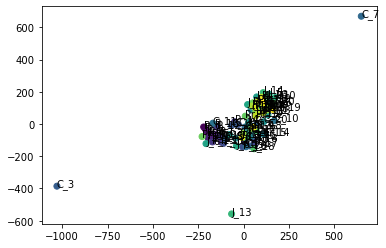

In [124]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [125]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

           x         y
0   3.154408  0.673755
1   3.093497  1.686342
2   5.120272  2.046572
3   5.732031  2.489840
4   4.645863  3.469761
..       ...       ...
79 -4.807036  0.346642
80  1.027089 -4.100385
81 -2.269355 -1.128570
82 -4.781033 -0.725638
83 -6.277021  0.709280

[84 rows x 2 columns]


In [126]:
df_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')

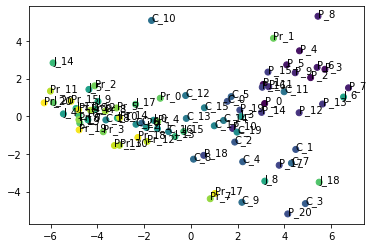

In [127]:
plt.scatter(df_1['x'], df_1['y'], c=range(84))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()

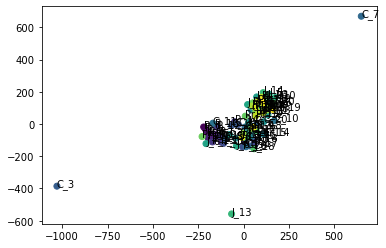

In [128]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

# Python Clustering 9 group target

In [129]:
similar_doc = model.docvecs.most_similar('9')
print(similar_doc[0])

('66', 0.8081414103507996)


In [130]:
similar_doc

[('66', 0.8081414103507996),
 ('74', 0.8011087775230408),
 ('72', 0.7955794930458069),
 ('1', 0.7764744162559509),
 ('4', 0.7685458064079285),
 ('16', 0.7602077722549438),
 ('8', 0.7563561201095581),
 ('69', 0.7498114109039307),
 ('67', 0.7454336881637573),
 ('83', 0.7436044216156006)]

In [131]:
model['9']

array([-0.5948461 ,  0.117419  , -0.33436018, -0.6496226 ,  3.527078  ,
        0.74368304,  0.4971717 ,  1.5751494 ,  3.0762506 , -0.23447627,
        1.8200878 , -2.0276499 ,  0.1008922 , -1.8852915 ,  1.0945319 ,
        1.0565368 ,  1.4416282 ,  0.260961  , -3.1015499 , -1.5080732 ,
        5.749947  , -1.6030891 ,  1.8117819 ,  0.6372905 , -1.9722869 ,
        0.28266972,  2.4387615 ,  2.7005558 ,  5.4309015 , -0.8565003 ],
      dtype=float32)

In [132]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=85)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

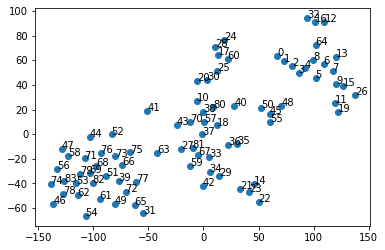

In [133]:
display_closestwords_tsnescatterplot(model, '9')

In [134]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
[[-0.77956176 -0.76622725 -0.64733267 ...  1.0667131   4.619297
  -0.19777155]
 [-1.3379048  -0.6056008  -0.08388423 ...  2.1020703   3.3426583
  -0.5350876 ]
 [-1.5250856  -1.3111327  -0.4799304  ...  2.6343467   3.5268412
  -0.47896624]
 ...
 [-0.6925632   2.2256174  -0.5240016  ...  0.74481404  2.4244525
  -0.18018657]
 [ 0.25318953  1.1237609   1.0547634  ...  1.0847285   1.1413052
   0.23915966]
 [ 0.00106104 -0.00411573 -0.01126159 ...  0.0053396   0.01551338
  -0.00107235]]


In [135]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

             x          y
0   101.573433  27.805676
1   108.636543  36.404854
2   117.226868  45.428764
3   125.049538  53.800922
4   135.220947  52.238106
..         ...        ...
79 -149.556213  -6.007168
80   54.380161 -35.674019
81   10.664063 -11.363880
82 -133.886948  16.517902
83 -168.276505 -19.309408

[84 rows x 2 columns]


In [136]:
df.to_csv('doc2vec9.csv')

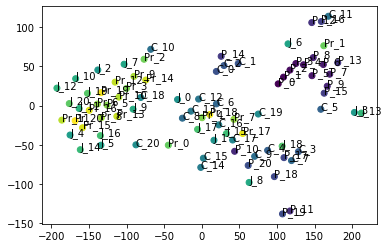

In [137]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [138]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

           x         y
0   3.154408  0.673755
1   3.093497  1.686342
2   5.120272  2.046572
3   5.732031  2.489840
4   4.645863  3.469761
..       ...       ...
79 -4.807036  0.346642
80  1.027089 -4.100385
81 -2.269355 -1.128570
82 -4.781033 -0.725638
83 -6.277021  0.709280

[84 rows x 2 columns]


In [139]:
df_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')

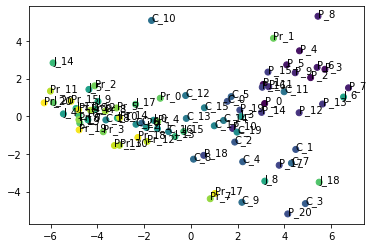

In [140]:
plt.scatter(df_1['x'], df_1['y'], c=range(84))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()

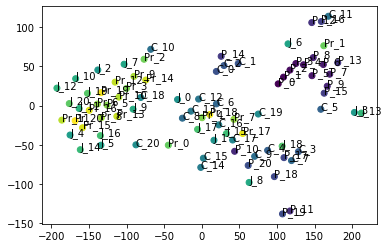

In [141]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

# Python Clustering 10 group target

In [142]:
similar_doc = model.docvecs.most_similar('10')
print(similar_doc[0])

('11', 0.9509202241897583)


In [143]:
similar_doc

[('11', 0.9509202241897583),
 ('7', 0.8639878630638123),
 ('14', 0.8634349703788757),
 ('3', 0.8557509183883667),
 ('0', 0.8447709083557129),
 ('5', 0.836093544960022),
 ('2', 0.8271901607513428),
 ('12', 0.7933956384658813),
 ('6', 0.7826153039932251),
 ('1', 0.7567434310913086)]

In [144]:
model['10']

array([-0.5270949 , -0.649966  , -1.1171188 ,  1.0257926 ,  1.0140901 ,
        1.8471227 ,  1.184859  , -2.8117354 ,  3.7085955 ,  0.5560394 ,
        2.741277  , -1.2197206 , -1.6147187 , -1.8921726 ,  0.89404595,
       -0.35735288,  0.9346538 ,  0.5023144 , -2.2546723 , -0.06631982,
        3.632902  , -1.1969988 ,  1.0610816 ,  1.0331459 , -0.1728627 ,
       -0.48260844,  1.2875518 ,  2.6256192 ,  4.767616  ,  0.22097427],
      dtype=float32)

In [145]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=85)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

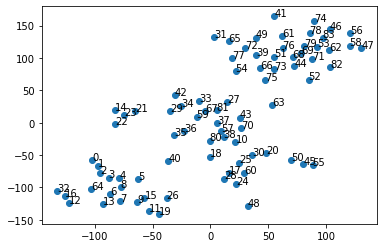

In [146]:
display_closestwords_tsnescatterplot(model, '10')

In [147]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
[[-0.77956176 -0.76622725 -0.64733267 ...  1.0667131   4.619297
  -0.19777155]
 [-1.3379048  -0.6056008  -0.08388423 ...  2.1020703   3.3426583
  -0.5350876 ]
 [-1.5250856  -1.3111327  -0.4799304  ...  2.6343467   3.5268412
  -0.47896624]
 ...
 [-0.6925632   2.2256174  -0.5240016  ...  0.74481404  2.4244525
  -0.18018657]
 [ 0.25318953  1.1237609   1.0547634  ...  1.0847285   1.1413052
   0.23915966]
 [ 0.00106104 -0.00411573 -0.01126159 ...  0.0053396   0.01551338
  -0.00107235]]


In [148]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

             x           y
0  -131.561142   91.885727
1  -122.070618   92.779419
2  -111.998734   96.736946
3  -101.479492   95.715218
4   -99.997116   86.786690
..         ...         ...
79   80.239883  -90.619461
80    2.987408   32.359959
81   18.208740   -8.722248
82   63.390034  -93.912811
83   82.805176 -113.268074

[84 rows x 2 columns]


In [149]:
df.to_csv('doc2vec10.csv')

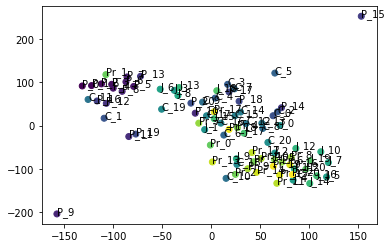

In [150]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [151]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

           x         y
0   3.154408  0.673755
1   3.093497  1.686342
2   5.120272  2.046572
3   5.732031  2.489840
4   4.645863  3.469761
..       ...       ...
79 -4.807036  0.346642
80  1.027089 -4.100385
81 -2.269355 -1.128570
82 -4.781033 -0.725638
83 -6.277021  0.709280

[84 rows x 2 columns]


In [152]:
df_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')

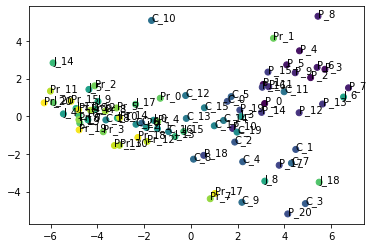

In [153]:
plt.scatter(df_1['x'], df_1['y'], c=range(84))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()

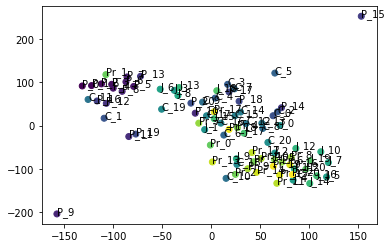

In [154]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

# Python Clustering 11 group target

In [155]:
similar_doc = model.docvecs.most_similar('11')
print(similar_doc[0])

('10', 0.9509201049804688)


In [156]:
similar_doc

[('10', 0.9509201049804688),
 ('3', 0.9143586158752441),
 ('7', 0.9034308195114136),
 ('14', 0.8587827682495117),
 ('2', 0.8560159206390381),
 ('6', 0.8510078191757202),
 ('12', 0.8472350835800171),
 ('8', 0.8455084562301636),
 ('4', 0.837543785572052),
 ('0', 0.829149603843689)]

In [157]:
model['11']

array([-1.3407263 , -0.33450738, -0.26908988, -1.4853184 ,  1.7713863 ,
       -0.2073012 ,  1.6655703 ,  0.43318754,  1.7542753 , -0.28515396,
        2.2592075 , -2.085728  ,  0.2238306 , -2.8165455 ,  0.16621512,
        1.678241  ,  0.7614925 ,  1.3216685 , -3.283605  , -1.0428922 ,
        4.790098  , -0.37533903,  1.1741555 , -2.291523  , -2.783614  ,
        2.2836885 ,  0.42792344,  3.3784168 ,  5.3120656 ,  0.34997606],
      dtype=float32)

In [158]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=85)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

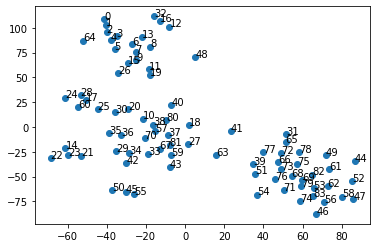

In [159]:
display_closestwords_tsnescatterplot(model, '11')

In [160]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
[[-0.77956176 -0.76622725 -0.64733267 ...  1.0667131   4.619297
  -0.19777155]
 [-1.3379048  -0.6056008  -0.08388423 ...  2.1020703   3.3426583
  -0.5350876 ]
 [-1.5250856  -1.3111327  -0.4799304  ...  2.6343467   3.5268412
  -0.47896624]
 ...
 [-0.6925632   2.2256174  -0.5240016  ...  0.74481404  2.4244525
  -0.18018657]
 [ 0.25318953  1.1237609   1.0547634  ...  1.0847285   1.1413052
   0.23915966]
 [ 0.00106104 -0.00411573 -0.01126159 ...  0.0053396   0.01551338
  -0.00107235]]


In [161]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

            x           y
0   35.201950 -200.717651
1   24.393831 -199.843658
2   12.252687 -200.514786
3    0.705539 -200.123566
4   -1.422773 -190.201492
..        ...         ...
79  24.024788  133.047104
80  30.379528  -33.411140
81  -0.288617    7.906233
82  -3.858153  134.492966
83  44.694023  137.956940

[84 rows x 2 columns]


In [162]:
df.to_csv('doc2vec11.csv')

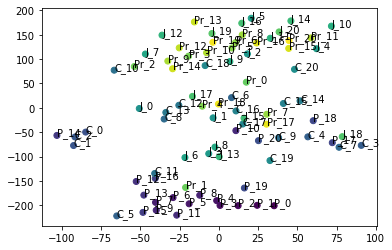

In [163]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [164]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

           x         y
0   3.154408  0.673755
1   3.093497  1.686342
2   5.120272  2.046572
3   5.732031  2.489840
4   4.645863  3.469761
..       ...       ...
79 -4.807036  0.346642
80  1.027089 -4.100385
81 -2.269355 -1.128570
82 -4.781033 -0.725638
83 -6.277021  0.709280

[84 rows x 2 columns]


In [165]:
df_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')

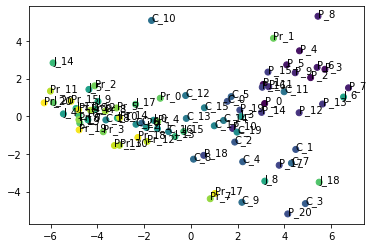

In [166]:
plt.scatter(df_1['x'], df_1['y'], c=range(84))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()

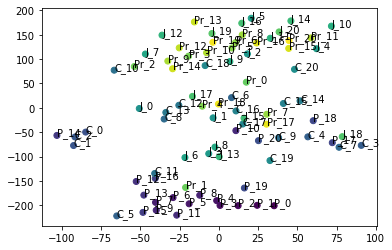

In [167]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

# Python Clustering 12 group target

In [168]:
similar_doc = model.docvecs.most_similar('12')
print(similar_doc[0])

('13', 0.9420024156570435)


In [169]:
similar_doc

[('13', 0.9420024156570435),
 ('6', 0.9129911661148071),
 ('14', 0.8750101327896118),
 ('8', 0.8736977577209473),
 ('2', 0.8678328990936279),
 ('1', 0.8526318073272705),
 ('4', 0.8475793600082397),
 ('11', 0.8472350835800171),
 ('3', 0.8417068719863892),
 ('7', 0.8283552527427673)]

In [170]:
model['12']

array([-1.9113693 ,  1.4299401 , -1.8499852 ,  0.5183746 ,  1.2109724 ,
        2.391783  ,  1.7115155 ,  0.25670516,  1.2485304 ,  1.7975221 ,
        2.0204518 , -2.7378335 , -1.7199804 , -0.9328637 , -1.1395724 ,
        1.402617  ,  2.542828  ,  1.1369044 , -1.974511  , -1.6271567 ,
        4.9017434 , -2.596526  ,  3.0530183 , -0.57995486, -1.890675  ,
       -0.31799182,  1.9395138 ,  5.126057  ,  5.4633665 , -0.55115056],
      dtype=float32)

In [171]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=85)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

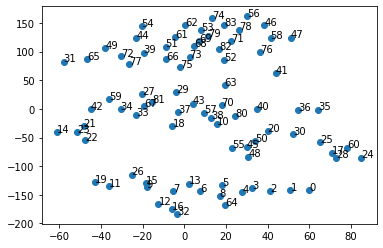

In [172]:
display_closestwords_tsnescatterplot(model, '12')

In [173]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
[[-0.77956176 -0.76622725 -0.64733267 ...  1.0667131   4.619297
  -0.19777155]
 [-1.3379048  -0.6056008  -0.08388423 ...  2.1020703   3.3426583
  -0.5350876 ]
 [-1.5250856  -1.3111327  -0.4799304  ...  2.6343467   3.5268412
  -0.47896624]
 ...
 [-0.6925632   2.2256174  -0.5240016  ...  0.74481404  2.4244525
  -0.18018657]
 [ 0.25318953  1.1237609   1.0547634  ...  1.0847285   1.1413052
   0.23915966]
 [ 0.00106104 -0.00411573 -0.01126159 ...  0.0053396   0.01551338
  -0.00107235]]


In [174]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

             x          y
0    62.336525 -38.393131
1    68.951981 -36.793583
2    76.517136 -35.213375
3    82.988144 -38.657524
4    87.072617 -33.822350
..         ...        ...
79  -87.257721  51.345959
80   -7.194737 -30.436859
81   -2.406674   1.104418
82  -77.471390  38.898224
83 -101.398720  55.099384

[84 rows x 2 columns]


In [175]:
df.to_csv('doc2vec12.csv')

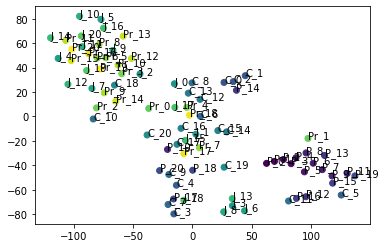

In [176]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [177]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

           x         y
0   3.154408  0.673755
1   3.093497  1.686342
2   5.120272  2.046572
3   5.732031  2.489840
4   4.645863  3.469761
..       ...       ...
79 -4.807036  0.346642
80  1.027089 -4.100385
81 -2.269355 -1.128570
82 -4.781033 -0.725638
83 -6.277021  0.709280

[84 rows x 2 columns]


In [178]:
df_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')

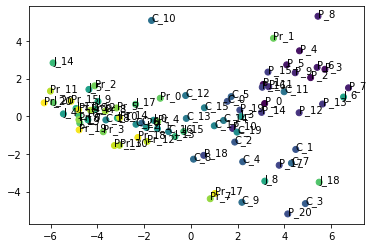

In [179]:
plt.scatter(df_1['x'], df_1['y'], c=range(84))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()

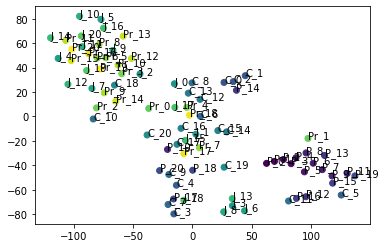

In [180]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

# Python Clustering 13 group target

In [181]:
similar_doc = model.docvecs.most_similar('13')
print(similar_doc[0])

('12', 0.9420022964477539)


In [182]:
similar_doc

[('12', 0.9420022964477539),
 ('14', 0.9316915273666382),
 ('6', 0.8540961146354675),
 ('16', 0.8462608456611633),
 ('2', 0.834663987159729),
 ('1', 0.8329434394836426),
 ('18', 0.8304561376571655),
 ('19', 0.8238535523414612),
 ('4', 0.8132401704788208),
 ('8', 0.8078100085258484)]

In [183]:
model['13']

array([-2.0126705 ,  1.722042  ,  0.8593378 ,  0.07537299,  2.1177034 ,
        2.875289  ,  0.41709134, -0.9220254 ,  4.5199566 ,  1.2669063 ,
        3.6048434 ,  1.3805859 , -0.9645911 , -4.20499   , -2.4314208 ,
       -0.06608299, -0.891466  , -0.06519412, -1.1509296 , -2.3206577 ,
        5.7696247 , -2.0769348 ,  2.9601715 , -0.34932014, -2.0541482 ,
        2.573477  ,  2.0344794 ,  2.0472481 ,  7.1940794 , -0.48639736],
      dtype=float32)

In [184]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=85)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

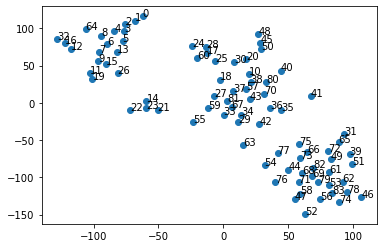

In [185]:
display_closestwords_tsnescatterplot(model, '13')

In [186]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
[[-0.77956176 -0.76622725 -0.64733267 ...  1.0667131   4.619297
  -0.19777155]
 [-1.3379048  -0.6056008  -0.08388423 ...  2.1020703   3.3426583
  -0.5350876 ]
 [-1.5250856  -1.3111327  -0.4799304  ...  2.6343467   3.5268412
  -0.47896624]
 ...
 [-0.6925632   2.2256174  -0.5240016  ...  0.74481404  2.4244525
  -0.18018657]
 [ 0.25318953  1.1237609   1.0547634  ...  1.0847285   1.1413052
   0.23915966]
 [ 0.00106104 -0.00411573 -0.01126159 ...  0.0053396   0.01551338
  -0.00107235]]


In [187]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

             x           y
0  -240.653381  106.285789
1  -233.167679  119.669044
2  -227.040558  135.813507
3  -212.185883  143.037476
4  -216.237762  156.756287
..         ...         ...
79  226.789474  -99.410599
80  -26.959072    6.990503
81   12.768311  -61.994431
82  215.316956  -57.808350
83  252.464386 -129.280594

[84 rows x 2 columns]


In [188]:
df.to_csv('doc2vec13.csv')

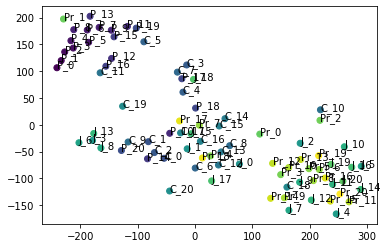

In [189]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [190]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

           x         y
0   3.154408  0.673755
1   3.093497  1.686342
2   5.120272  2.046572
3   5.732031  2.489840
4   4.645863  3.469761
..       ...       ...
79 -4.807036  0.346642
80  1.027089 -4.100385
81 -2.269355 -1.128570
82 -4.781033 -0.725638
83 -6.277021  0.709280

[84 rows x 2 columns]


In [191]:
df_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')

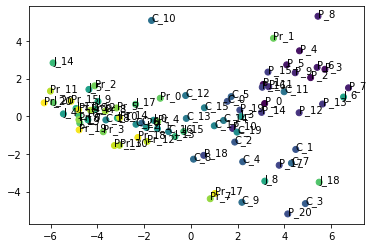

In [192]:
plt.scatter(df_1['x'], df_1['y'], c=range(84))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()

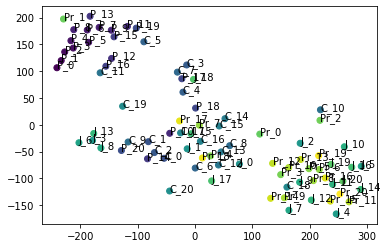

In [193]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

# Python Clustering 14 group target

In [194]:
similar_doc = model.docvecs.most_similar('14')
print(similar_doc[0])

('13', 0.9316916465759277)


In [195]:
similar_doc

[('13', 0.9316916465759277),
 ('12', 0.8750101923942566),
 ('10', 0.8634349703788757),
 ('11', 0.8587827682495117),
 ('7', 0.8454298973083496),
 ('6', 0.8388717174530029),
 ('2', 0.8316266536712646),
 ('16', 0.829357385635376),
 ('3', 0.8287224769592285),
 ('18', 0.8279004693031311)]

In [196]:
model['14']

array([ 0.62769365,  0.37718529, -0.31414926,  1.2727041 ,  0.13281456,
        0.22878842,  1.3891854 ,  2.2210877 , -0.60370344,  2.2897882 ,
        3.1924174 , -2.4932036 , -1.1238235 , -2.0278397 , -1.8033819 ,
        2.251915  ,  1.0734941 , -0.64290905, -2.1863961 , -1.2317532 ,
        5.4267054 , -1.9496788 ,  1.084544  ,  1.8657796 , -1.7885318 ,
        0.5668359 , -0.05278658,  2.9440463 ,  5.4181533 , -0.09265354],
      dtype=float32)

In [197]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=85)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

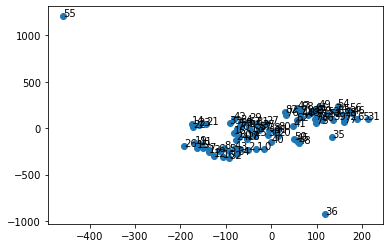

In [198]:
display_closestwords_tsnescatterplot(model, '14')

In [199]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
[[-0.77956176 -0.76622725 -0.64733267 ...  1.0667131   4.619297
  -0.19777155]
 [-1.3379048  -0.6056008  -0.08388423 ...  2.1020703   3.3426583
  -0.5350876 ]
 [-1.5250856  -1.3111327  -0.4799304  ...  2.6343467   3.5268412
  -0.47896624]
 ...
 [-0.6925632   2.2256174  -0.5240016  ...  0.74481404  2.4244525
  -0.18018657]
 [ 0.25318953  1.1237609   1.0547634  ...  1.0847285   1.1413052
   0.23915966]
 [ 0.00106104 -0.00411573 -0.01126159 ...  0.0053396   0.01551338
  -0.00107235]]


In [200]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

             x          y
0    86.005760   0.050611
1    91.552353  -4.893529
2    98.124321 -10.298129
3   105.857712  -9.020010
4   109.671814 -14.719491
..         ...        ...
79  -93.983589   4.099027
80   23.125252 -12.249244
81  -12.746116  -0.363875
82  -83.295509 -11.180886
83 -107.210159  16.823025

[84 rows x 2 columns]


In [201]:
df.to_csv('doc2vec14.csv')

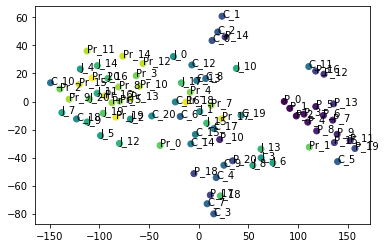

In [202]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [203]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

           x         y
0   3.154408  0.673755
1   3.093497  1.686342
2   5.120272  2.046572
3   5.732031  2.489840
4   4.645863  3.469761
..       ...       ...
79 -4.807036  0.346642
80  1.027089 -4.100385
81 -2.269355 -1.128570
82 -4.781033 -0.725638
83 -6.277021  0.709280

[84 rows x 2 columns]


In [204]:
df_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')

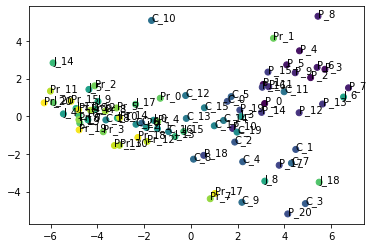

In [205]:
plt.scatter(df_1['x'], df_1['y'], c=range(84))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()

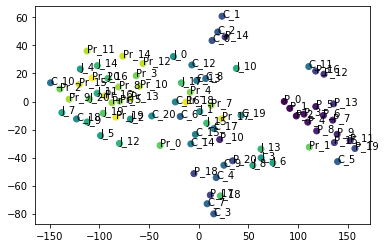

In [206]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

# Python Clustering 15 group target

In [207]:
similar_doc = model.docvecs.most_similar('15')
print(similar_doc[0])

('18', 0.8763683438301086)


In [208]:
similar_doc

[('18', 0.8763683438301086),
 ('16', 0.8740853071212769),
 ('20', 0.8700163960456848),
 ('19', 0.8289895057678223),
 ('17', 0.8170389533042908),
 ('5', 0.8156821727752686),
 ('14', 0.8114317059516907),
 ('13', 0.8034873008728027),
 ('6', 0.7768009305000305),
 ('2', 0.7434144020080566)]

In [209]:
model['15']

array([-0.90401506, -0.5119973 ,  0.17778073, -0.477763  ,  2.0243235 ,
       -0.14415117, -1.1308264 ,  1.0572927 ,  2.3068986 ,  0.06228707,
        1.1652281 , -3.209698  , -1.0491213 , -1.6519587 ,  1.6214652 ,
        1.4993215 ,  0.44846   ,  0.9595367 , -1.6432661 , -1.2918507 ,
        4.3380938 , -2.4121244 ,  1.6139615 ,  0.2328952 , -2.1809688 ,
       -0.78729063,  2.0724347 ,  2.1265924 ,  6.505566  , -0.61360097],
      dtype=float32)

In [210]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=85)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

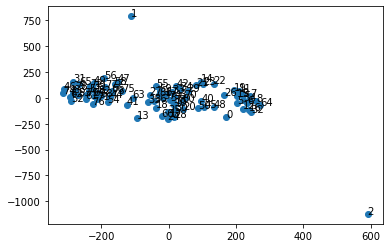

In [211]:
display_closestwords_tsnescatterplot(model, '15')

In [212]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
[[-0.77956176 -0.76622725 -0.64733267 ...  1.0667131   4.619297
  -0.19777155]
 [-1.3379048  -0.6056008  -0.08388423 ...  2.1020703   3.3426583
  -0.5350876 ]
 [-1.5250856  -1.3111327  -0.4799304  ...  2.6343467   3.5268412
  -0.47896624]
 ...
 [-0.6925632   2.2256174  -0.5240016  ...  0.74481404  2.4244525
  -0.18018657]
 [ 0.25318953  1.1237609   1.0547634  ...  1.0847285   1.1413052
   0.23915966]
 [ 0.00106104 -0.00411573 -0.01126159 ...  0.0053396   0.01551338
  -0.00107235]]


In [213]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

             x           y
0    89.738495  -99.861099
1   101.752831  -92.849060
2   115.444176  -85.916542
3   127.610733  -77.894012
4   137.534698  -86.308723
..         ...         ...
79 -156.810928  -40.949738
80    2.808686  123.442375
81   11.247911   63.132214
82 -125.476082  -53.021709
83 -195.204758  -40.819717

[84 rows x 2 columns]


In [214]:
df.to_csv('doc2vec15.csv')

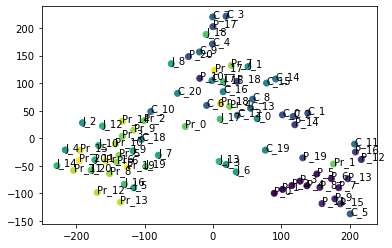

In [215]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [216]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

           x         y
0   3.154408  0.673755
1   3.093497  1.686342
2   5.120272  2.046572
3   5.732031  2.489840
4   4.645863  3.469761
..       ...       ...
79 -4.807036  0.346642
80  1.027089 -4.100385
81 -2.269355 -1.128570
82 -4.781033 -0.725638
83 -6.277021  0.709280

[84 rows x 2 columns]


In [217]:
df_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')

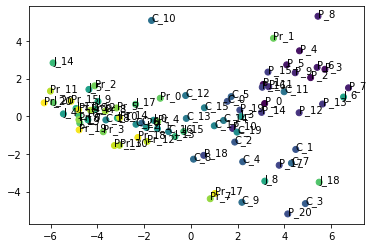

In [218]:
plt.scatter(df_1['x'], df_1['y'], c=range(84))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()

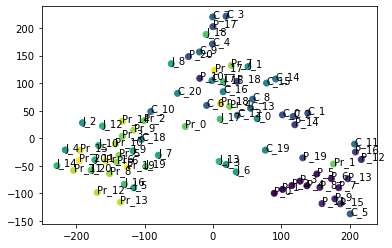

In [219]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

# Python Clustering 16 group target

In [220]:
similar_doc = model.docvecs.most_similar('16')
print(similar_doc[0])

('17', 0.9373618960380554)


In [221]:
similar_doc

[('17', 0.9373618960380554),
 ('19', 0.8803102970123291),
 ('15', 0.8740853071212769),
 ('20', 0.872254490852356),
 ('18', 0.8687257766723633),
 ('13', 0.8462608456611633),
 ('6', 0.8406487703323364),
 ('14', 0.8293572664260864),
 ('3', 0.8001013994216919),
 ('4', 0.7868928909301758)]

In [222]:
model['16']

array([-1.1247869 , -0.07672662, -0.1612491 ,  0.32566223,  0.2741516 ,
        2.422056  , -0.6680447 ,  0.9048072 ,  0.21658713,  0.34581995,
        1.7765326 , -1.8104725 , -0.93426037, -1.939197  , -0.5503253 ,
        1.4971972 ,  1.0189395 ,  0.89031297,  1.2173539 ,  0.16505827,
        4.976403  , -1.350839  ,  3.5328536 ,  0.30042353, -3.3095388 ,
        0.5343405 ,  1.5456201 ,  4.8119307 ,  4.0220747 , -1.4744338 ],
      dtype=float32)

In [223]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=85)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

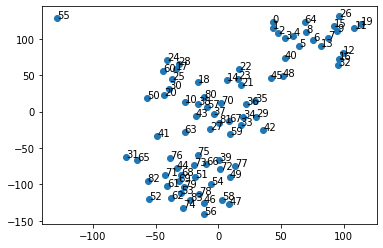

In [224]:
display_closestwords_tsnescatterplot(model, '16')

In [225]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
[[-0.77956176 -0.76622725 -0.64733267 ...  1.0667131   4.619297
  -0.19777155]
 [-1.3379048  -0.6056008  -0.08388423 ...  2.1020703   3.3426583
  -0.5350876 ]
 [-1.5250856  -1.3111327  -0.4799304  ...  2.6343467   3.5268412
  -0.47896624]
 ...
 [-0.6925632   2.2256174  -0.5240016  ...  0.74481404  2.4244525
  -0.18018657]
 [ 0.25318953  1.1237609   1.0547634  ...  1.0847285   1.1413052
   0.23915966]
 [ 0.00106104 -0.00411573 -0.01126159 ...  0.0053396   0.01551338
  -0.00107235]]


In [226]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

               x            y
0   11233.204102 -6975.133301
1    -708.189148   228.629532
2     160.001266   -68.881432
3     163.554016   -55.358391
4     153.118973   -49.501259
..           ...          ...
79   -155.186829    55.813908
80     -3.764200   -56.711578
81     14.948243    -1.774685
82   -131.261337    72.450317
83   -179.731781    55.240807

[84 rows x 2 columns]


In [227]:
df.to_csv('doc2vec16.csv')

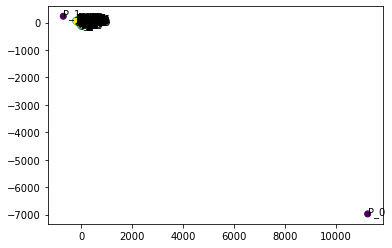

In [228]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [229]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

           x         y
0   3.154408  0.673755
1   3.093497  1.686342
2   5.120272  2.046572
3   5.732031  2.489840
4   4.645863  3.469761
..       ...       ...
79 -4.807036  0.346642
80  1.027089 -4.100385
81 -2.269355 -1.128570
82 -4.781033 -0.725638
83 -6.277021  0.709280

[84 rows x 2 columns]


In [230]:
df_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')

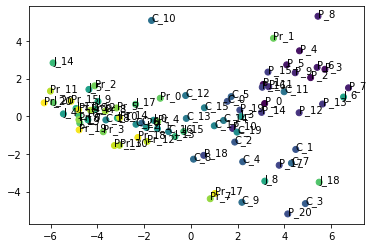

In [231]:
plt.scatter(df_1['x'], df_1['y'], c=range(84))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()

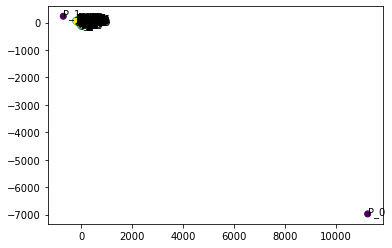

In [232]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

# Python Clustering 17 group target

In [233]:
similar_doc = model.docvecs.most_similar('17')
print(similar_doc[0])

('16', 0.9373620748519897)


In [234]:
similar_doc

[('16', 0.9373620748519897),
 ('18', 0.9215713739395142),
 ('20', 0.8991665840148926),
 ('19', 0.885339617729187),
 ('15', 0.8170389533042908),
 ('13', 0.8062124252319336),
 ('6', 0.7965863943099976),
 ('11', 0.7951639890670776),
 ('8', 0.7688772082328796),
 ('4', 0.7683652639389038)]

In [235]:
model['17']

array([-0.35246104,  0.3981566 , -1.5455908 ,  0.22300711, -0.32455444,
        0.49482155,  1.1854539 , -0.2604435 ,  2.7005231 , -1.0627347 ,
       -0.94398034, -2.2585247 , -0.8185969 , -3.418385  , -1.933215  ,
        1.1319393 ,  0.12312786,  0.7876097 , -1.0530238 , -2.436421  ,
        4.1286907 , -0.5062982 ,  3.5031178 ,  3.2637663 , -3.8746567 ,
       -0.6853911 ,  0.6875644 ,  3.5397487 ,  5.075883  , -1.8185972 ],
      dtype=float32)

In [236]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=85)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

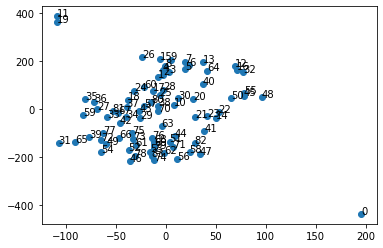

In [237]:
display_closestwords_tsnescatterplot(model, '17')

In [238]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
[[-0.77956176 -0.76622725 -0.64733267 ...  1.0667131   4.619297
  -0.19777155]
 [-1.3379048  -0.6056008  -0.08388423 ...  2.1020703   3.3426583
  -0.5350876 ]
 [-1.5250856  -1.3111327  -0.4799304  ...  2.6343467   3.5268412
  -0.47896624]
 ...
 [-0.6925632   2.2256174  -0.5240016  ...  0.74481404  2.4244525
  -0.18018657]
 [ 0.25318953  1.1237609   1.0547634  ...  1.0847285   1.1413052
   0.23915966]
 [ 0.00106104 -0.00411573 -0.01126159 ...  0.0053396   0.01551338
  -0.00107235]]


In [239]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

            x          y
0  -80.379883 -45.965031
1  -76.750153 -50.615601
2  -73.538773 -56.472221
3  -67.394974 -57.918903
4  -67.261681 -63.469559
..        ...        ...
79  82.711670  51.715210
80 -15.630733  13.372474
81   8.377605   6.261141
82  81.119263  39.699337
83  96.692535  53.205067

[84 rows x 2 columns]


In [240]:
df.to_csv('doc2vec17.csv')

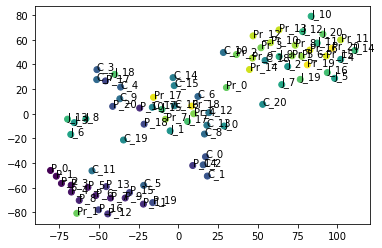

In [241]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [242]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

           x         y
0   3.154408  0.673755
1   3.093497  1.686342
2   5.120272  2.046572
3   5.732031  2.489840
4   4.645863  3.469761
..       ...       ...
79 -4.807036  0.346642
80  1.027089 -4.100385
81 -2.269355 -1.128570
82 -4.781033 -0.725638
83 -6.277021  0.709280

[84 rows x 2 columns]


In [243]:
df_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')

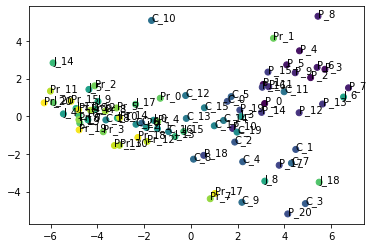

In [244]:
plt.scatter(df_1['x'], df_1['y'], c=range(84))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()

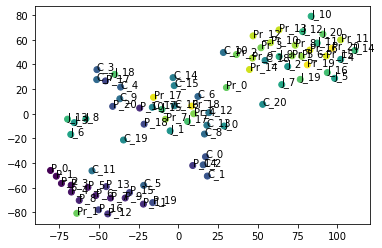

In [245]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

# Python Clustering 18 group target

In [246]:
similar_doc = model.docvecs.most_similar('18')
print(similar_doc[0])

('19', 0.94167560338974)


In [247]:
similar_doc

[('19', 0.94167560338974),
 ('20', 0.9300791621208191),
 ('17', 0.9215712547302246),
 ('15', 0.8763683438301086),
 ('16', 0.8687257766723633),
 ('13', 0.8304561972618103),
 ('14', 0.8279004693031311),
 ('11', 0.7739081382751465),
 ('12', 0.7595292925834656),
 ('0', 0.7456219792366028)]

In [248]:
model['18']

array([ 0.7951587 ,  0.94311595,  2.329981  , -0.7180054 , -0.21834967,
        0.8103405 ,  0.26437113,  0.7364312 ,  1.5996817 ,  0.06353106,
       -1.1962376 , -2.8891704 , -1.5660549 , -2.445912  , -1.3866019 ,
       -1.661698  , -0.68043476, -0.5182461 , -0.14644067, -5.363708  ,
        1.5800778 , -1.1079981 ,  2.274054  , -0.31479686, -3.7857625 ,
       -0.7667984 ,  0.7215727 ,  2.2891076 ,  5.5717425 ,  0.04683514],
      dtype=float32)

In [249]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=85)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

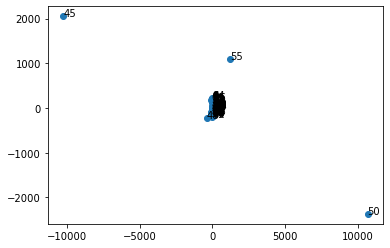

In [250]:
display_closestwords_tsnescatterplot(model, '18')

In [251]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
[[-0.77956176 -0.76622725 -0.64733267 ...  1.0667131   4.619297
  -0.19777155]
 [-1.3379048  -0.6056008  -0.08388423 ...  2.1020703   3.3426583
  -0.5350876 ]
 [-1.5250856  -1.3111327  -0.4799304  ...  2.6343467   3.5268412
  -0.47896624]
 ...
 [-0.6925632   2.2256174  -0.5240016  ...  0.74481404  2.4244525
  -0.18018657]
 [ 0.25318953  1.1237609   1.0547634  ...  1.0847285   1.1413052
   0.23915966]
 [ 0.00106104 -0.00411573 -0.01126159 ...  0.0053396   0.01551338
  -0.00107235]]


In [252]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

             x           y
0    44.226711  181.677292
1    29.122091  186.537720
2    12.714926  193.257538
3    -3.949243  189.661346
4   -10.056828  203.013519
..         ...         ...
79  170.195358  -90.489815
80  -36.273205  -21.554136
81  -95.072166   15.060304
82  190.936340  -36.967533
83  186.994675 -120.035713

[84 rows x 2 columns]


In [253]:
df.to_csv('doc2vec18.csv')

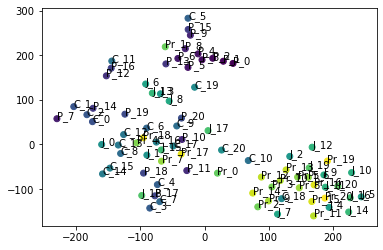

In [254]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [255]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

           x         y
0   3.154408  0.673755
1   3.093497  1.686342
2   5.120272  2.046572
3   5.732031  2.489840
4   4.645863  3.469761
..       ...       ...
79 -4.807036  0.346642
80  1.027089 -4.100385
81 -2.269355 -1.128570
82 -4.781033 -0.725638
83 -6.277021  0.709280

[84 rows x 2 columns]


In [256]:
df_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')

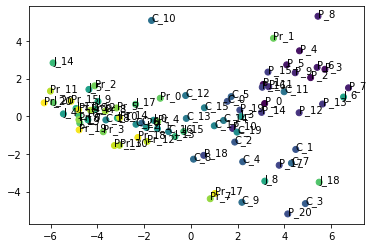

In [257]:
plt.scatter(df_1['x'], df_1['y'], c=range(84))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()

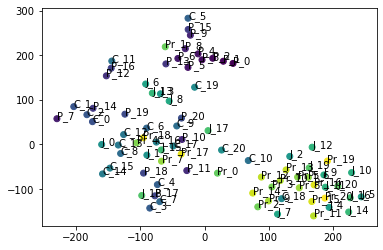

In [258]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

# Python Clustering 19 group target

In [259]:
similar_doc = model.docvecs.most_similar('19')
print(similar_doc[0])

('18', 0.9416756629943848)


In [260]:
similar_doc

[('18', 0.9416756629943848),
 ('20', 0.9321869015693665),
 ('17', 0.885339617729187),
 ('16', 0.8803102970123291),
 ('15', 0.8289895057678223),
 ('13', 0.823853611946106),
 ('14', 0.8076094388961792),
 ('32', 0.7571554183959961),
 ('21', 0.7549083232879639),
 ('12', 0.7447404265403748)]

In [261]:
model['19']

array([ 0.98237634, -0.16361612, -0.11658945, -2.1969888 ,  1.394296  ,
       -0.6981054 ,  0.46215498, -0.14227714,  0.36311984, -0.32686234,
        1.353657  , -1.4963083 , -1.7108848 , -2.1691575 , -1.4748993 ,
        2.256451  , -1.0777296 ,  0.59980327, -1.4302998 , -2.938354  ,
        4.295006  , -0.96409225,  1.4049263 , -0.68415326, -3.1639712 ,
        3.4344702 , -1.159556  ,  2.2936804 ,  5.0828543 , -0.93299675],
      dtype=float32)

In [262]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=85)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

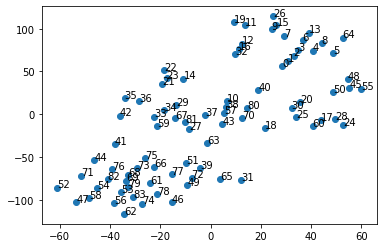

In [263]:
display_closestwords_tsnescatterplot(model, '19')

In [264]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
[[-0.77956176 -0.76622725 -0.64733267 ...  1.0667131   4.619297
  -0.19777155]
 [-1.3379048  -0.6056008  -0.08388423 ...  2.1020703   3.3426583
  -0.5350876 ]
 [-1.5250856  -1.3111327  -0.4799304  ...  2.6343467   3.5268412
  -0.47896624]
 ...
 [-0.6925632   2.2256174  -0.5240016  ...  0.74481404  2.4244525
  -0.18018657]
 [ 0.25318953  1.1237609   1.0547634  ...  1.0847285   1.1413052
   0.23915966]
 [ 0.00106104 -0.00411573 -0.01126159 ...  0.0053396   0.01551338
  -0.00107235]]


In [265]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

            x           y
0  -48.273590  131.714951
1  -57.535160  131.045959
2  -68.095490  131.086182
3  -74.419388  123.350853
4  -82.229668  127.177429
..        ...         ...
79  74.473000  -90.778244
80  16.942921   35.686687
81   4.110404    2.150944
82  88.915306  -80.540192
83  85.822647 -109.531761

[84 rows x 2 columns]


In [266]:
df.to_csv('doc2vec19.csv')

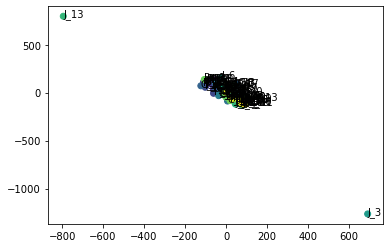

In [267]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [268]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

           x         y
0   3.154408  0.673755
1   3.093497  1.686342
2   5.120272  2.046572
3   5.732031  2.489840
4   4.645863  3.469761
..       ...       ...
79 -4.807036  0.346642
80  1.027089 -4.100385
81 -2.269355 -1.128570
82 -4.781033 -0.725638
83 -6.277021  0.709280

[84 rows x 2 columns]


In [269]:
df_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')

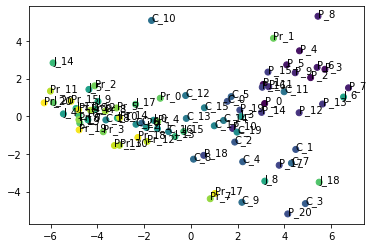

In [270]:
plt.scatter(df_1['x'], df_1['y'], c=range(84))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()

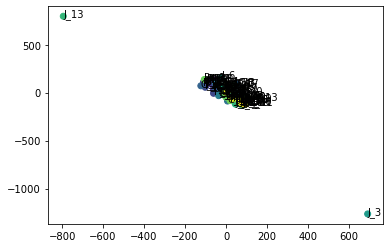

In [271]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

# Python Clustering 20 group target

In [272]:
similar_doc = model.docvecs.most_similar('20')
print(similar_doc[0])

('19', 0.9321869015693665)


In [273]:
similar_doc

[('19', 0.9321869015693665),
 ('18', 0.9300793409347534),
 ('17', 0.8991665840148926),
 ('16', 0.8722546100616455),
 ('15', 0.8700163960456848),
 ('13', 0.7817903757095337),
 ('14', 0.7710489630699158),
 ('32', 0.724177360534668),
 ('5', 0.6907896995544434),
 ('11', 0.6863100528717041)]

In [274]:
model['20']

array([ 0.54536897,  0.3448428 , -0.8668239 , -0.3769957 , -1.579599  ,
        0.86124784,  0.5532924 , -3.7160354 ,  5.3745246 ,  0.40356684,
        0.51774985, -2.4651618 , -3.146485  , -2.5686815 , -0.93507475,
        1.4082037 ,  3.1286438 ,  0.83192074, -1.2243128 , -1.8501767 ,
        7.2427125 , -1.1359632 ,  2.551252  ,  2.7696269 ,  0.500137  ,
        0.1260177 ,  0.4751149 ,  2.0230315 ,  4.444447  ,  0.7049291 ],
      dtype=float32)

In [275]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=85)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

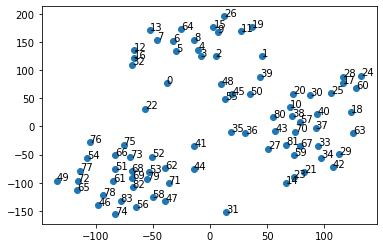

In [276]:
display_closestwords_tsnescatterplot(model, '20')

In [277]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
[[-0.77956176 -0.76622725 -0.64733267 ...  1.0667131   4.619297
  -0.19777155]
 [-1.3379048  -0.6056008  -0.08388423 ...  2.1020703   3.3426583
  -0.5350876 ]
 [-1.5250856  -1.3111327  -0.4799304  ...  2.6343467   3.5268412
  -0.47896624]
 ...
 [-0.6925632   2.2256174  -0.5240016  ...  0.74481404  2.4244525
  -0.18018657]
 [ 0.25318953  1.1237609   1.0547634  ...  1.0847285   1.1413052
   0.23915966]
 [ 0.00106104 -0.00411573 -0.01126159 ...  0.0053396   0.01551338
  -0.00107235]]


In [278]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

             x           y
0   150.494293   87.172501
1   141.329498   84.786911
2   131.133194   82.087486
3   121.348289   78.205055
4   125.114655   69.960464
..         ...         ...
79  -79.470932 -105.229088
80  -56.627693   31.418056
81  -22.134916    7.145340
82  -59.518242 -111.312622
83  -98.622856 -110.906448

[84 rows x 2 columns]


In [279]:
df.to_csv('doc2vec20.csv')

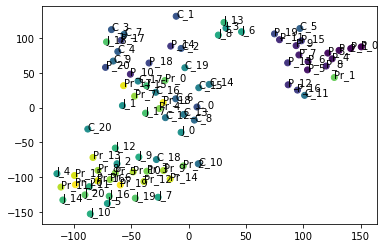

In [280]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [281]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

           x         y
0   3.154408  0.673755
1   3.093497  1.686342
2   5.120272  2.046572
3   5.732031  2.489840
4   4.645863  3.469761
..       ...       ...
79 -4.807036  0.346642
80  1.027089 -4.100385
81 -2.269355 -1.128570
82 -4.781033 -0.725638
83 -6.277021  0.709280

[84 rows x 2 columns]


In [282]:
df_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')

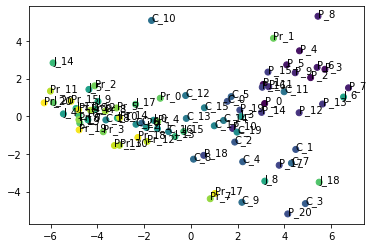

In [283]:
plt.scatter(df_1['x'], df_1['y'], c=range(84))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()

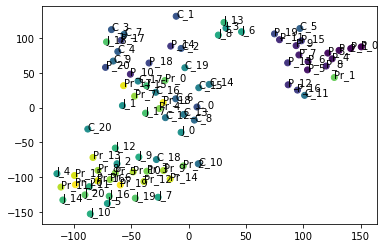

In [284]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()